In [11]:
from collections import defaultdict
import matplotlib.pyplot as plt
import torch
import transformers
import pickle
from tqdm import tqdm

In [12]:
with open('../data/metadata_filtered.pkl','rb') as f:
    data = pickle.load(f)

In [13]:
len(data)

274296

In [21]:
bert_tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased')
bert_tokens = {}
for id in tqdm(data):
    obj = data[id]
    abstract = obj['abstract']
    tokens = bert_tokenizer.tokenize(abstract)
    encoded = [bert_tokenizer.cls_token_id] + bert_tokenizer.convert_tokens_to_ids(tokens)
    encoded = encoded[:512]
    bert_tokens[id] = encoded

100%|██████████| 274296/274296 [01:52<00:00, 2444.84it/s]


In [22]:
lengths = [len(bert_tokens[k]) for k in bert_tokens]

(array([ 3519., 19659., 49475., 70632., 61367., 38033., 19692.,  7743.,
         2243.,  1933.]),
 array([  3. ,  53.9, 104.8, 155.7, 206.6, 257.5, 308.4, 359.3, 410.2,
        461.1, 512. ]),
 <a list of 10 Patch objects>)

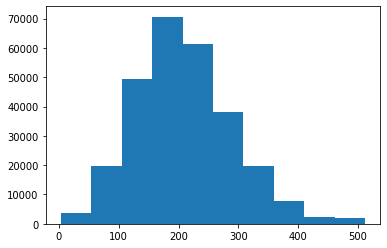

In [24]:
plt.hist(lengths)

In [25]:
with open('../data/metadata_bert_tokens.pkl','wb') as f:
    pickle.dump(bert_tokens, f)